In [103]:
import pandas as pd

country_vaccinations_path = '../Projekt_PAD/data/daily-covid-19-vaccine-doses-administered.csv'
daily_covid_info_path = '../Projekt_PAD/data/daily_covid_info.csv'

country_vaccinations = pd.read_csv(country_vaccinations_path)
daily_covid_info = pd.read_csv(daily_covid_info_path)

country_vaccinations_us = country_vaccinations[country_vaccinations['Entity'] == 'United States']
daily_covid_info_us = daily_covid_info[daily_covid_info['Country_code'] == 'US']


In [21]:
daily_covid_info_us

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
41,2020-01-04,US,United States of America,AMR,NaN,0,NaN,0
419,2020-01-05,US,United States of America,AMR,NaN,0,NaN,0
521,2020-01-06,US,United States of America,AMR,NaN,0,NaN,0
899,2020-01-07,US,United States of America,AMR,NaN,0,NaN,0
1001,2020-01-08,US,United States of America,AMR,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
437801,2025-01-01,US,United States of America,AMR,NaN,103436829,NaN,1212060
438179,2025-01-02,US,United States of America,AMR,NaN,103436829,NaN,1212060
438281,2025-01-03,US,United States of America,AMR,NaN,103436829,NaN,1212060
438659,2025-01-04,US,United States of America,AMR,NaN,103436829,NaN,1212060


In [22]:
country_vaccinations_us

,Entity,Day,COVID-19 doses (daily)
63653,United States,2020-12-14,4848.0
63654,United States,2020-12-15,47885.0
63655,United States,2020-12-16,160151.0
63656,United States,2020-12-17,275238.0
63657,United States,2020-12-18,421048.0
...,...,...,...
64525,United States,2023-05-05,105724.0
64526,United States,2023-05-06,40672.0
64527,United States,2023-05-07,21386.0
64528,United States,2023-05-08,55634.0


In [104]:
merged_data = pd.merge(
    daily_covid_info_us,
    country_vaccinations_us,
    left_on="Date_reported",
    right_on="Day",
    how="left"
)
merged_data.rename(columns={'COVID-19 doses (daily)': 'daily_vaccinations'}, inplace=True)

In [105]:
merged_data["daily_vaccinations"] = merged_data["daily_vaccinations"].fillna(0)
merged_data["New_cases"] = merged_data["New_cases"].fillna(0)
merged_data["New_deaths"] = merged_data["New_deaths"].fillna(0)

In [106]:
merged_data_final = merged_data[["Date_reported", "New_cases", "New_deaths", "daily_vaccinations"]]
last_valid_date = "2023-05-09"
merged_data_final = merged_data_final[merged_data_final['Date_reported'] <= last_valid_date]
# merged_data_final.to_csv('data_output/usa_covid_analysis.csv', index=False)

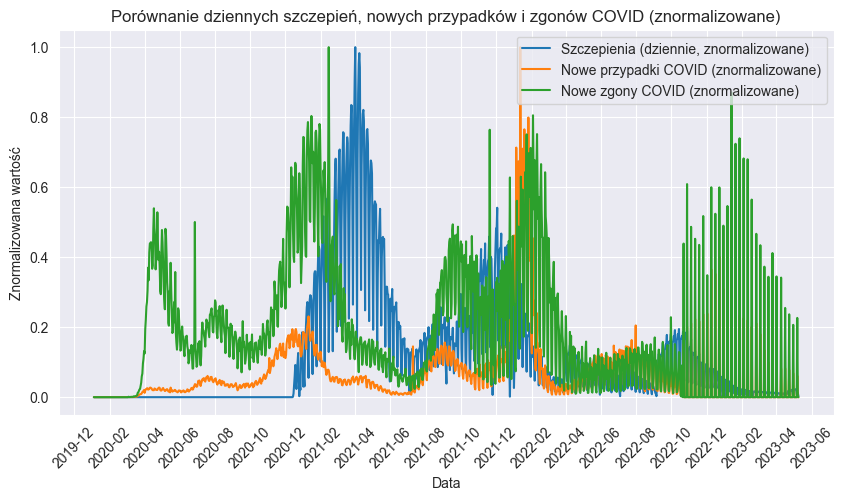

In [146]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
merged_data_final = merged_data_final[merged_data_final["New_deaths"] >= 0]

merged_data_final["daily_vaccinations_normalized"] = (
    merged_data_final["daily_vaccinations"] - merged_data_final["daily_vaccinations"].min()
) / (
    merged_data_final["daily_vaccinations"].max() - merged_data_final["daily_vaccinations"].min()
)

merged_data_final["New_cases_normalized"] = (
    merged_data_final["New_cases"] - merged_data_final["New_cases"].min()
) / (
    merged_data_final["New_cases"].max() - merged_data_final["New_cases"].min()
)

merged_data_final["New_deaths_normalized"] = (
    merged_data_final["New_deaths"] - merged_data_final["New_deaths"].min()
) / (
    merged_data_final["New_deaths"].max() - merged_data_final["New_deaths"].min()
)

merged_data_final["Date_reported"] = pd.to_datetime(merged_data_final["Date_reported"], errors="coerce")
merged_data_final = merged_data_final.dropna(subset=["Date_reported"])

plt.figure(figsize=(10, 5))
plt.plot(merged_data_final["Date_reported"], merged_data_final["daily_vaccinations_normalized"], label="Szczepienia (dziennie, znormalizowane)")
plt.plot(merged_data_final["Date_reported"], merged_data_final["New_cases_normalized"], label="Nowe przypadki COVID (znormalizowane)")
plt.plot(merged_data_final["Date_reported"], merged_data_final["New_deaths_normalized"], label="Nowe zgony COVID (znormalizowane)")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.legend()
plt.title("Porównanie dziennych szczepień, nowych przypadków i zgonów COVID (znormalizowane)")
plt.xlabel("Data")
plt.ylabel("Znormalizowana wartość")
plt.xticks(rotation=45)
plt.show()

1. Wpływ rozpoczęcia szczepień na śmiertelność
W momencie rozpoczęcia masowych szczepień w końcówce 2020 roku i początku 2021 roku liczba zgonów zaczęła maleć, mimo że przypadki COVID-19 utrzymywały się na wysokim poziomie.
Wniosek: Szczepienia miały bezpośredni wpływ na redukcję ciężkich przypadków COVID-19 i śmiertelności.
2. Wysoka liczba przypadków w 2022 roku przy relatywnie niskiej śmiertelności
W 2022 roku zaobserwowano większą liczbę zachorowań, ale liczba zgonów była stosunkowo niska.
Możliwa interpretacja: Wysokie wskaźniki szczepień oraz naturalna odporność mogły znacząco zmniejszyć ryzyko śmierci pomimo większej liczby zakażeń.
3. 2023 rok - mniej szczepień, mniej zachorowań, ale wyższa śmiertelność
W 2023 roku liczba szczepień drastycznie spadła, co zbiega się w czasie z mniejszą liczbą zachorowań. Jednak przy zmniejszonym poziomie szczepień wzrosła liczba zgonów w stosunku do przypadków.
Możliwa interpretacja: Spadek odporności w populacji mógł prowadzić do bardziej śmiertelnych przebiegów u osób, które nie były szczepione lub nie miały odporności.
4. Sezonowość
Widać wyraźną sezonowość w liczbie zachorowań, co może być związane z różnymi wariantami wirusa, zimniejszymi porami roku oraz innymi czynnikami środowiskowymi.
Wniosek: Przygotowania (np. kampanie szczepień) powinny być intensyfikowane przed sezonami zwiększonej liczby przypadków.

<Figure size 0x1000 with 0 Axes>

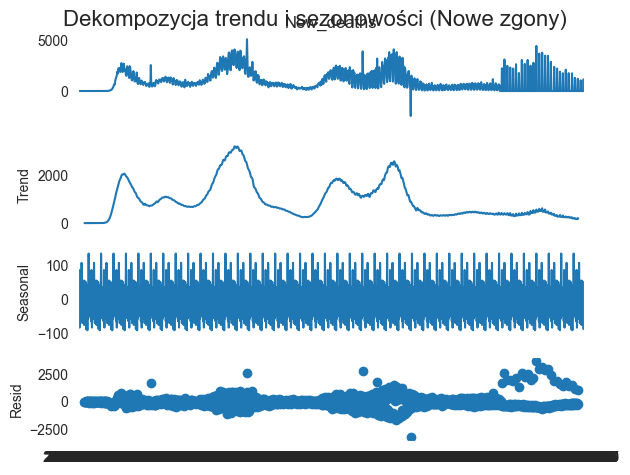

<Figure size 0x1000 with 0 Axes>

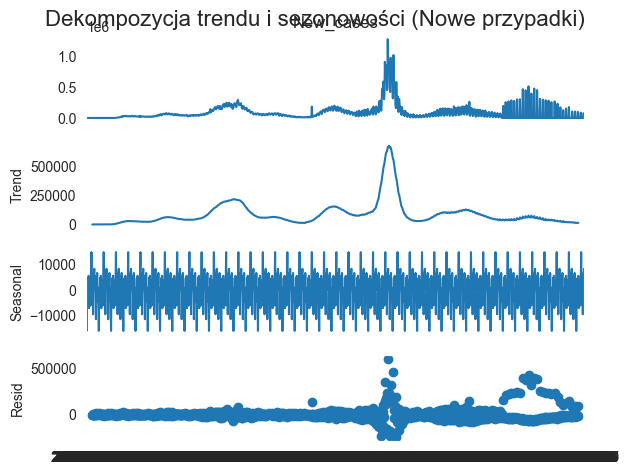

<Figure size 0x1000 with 0 Axes>

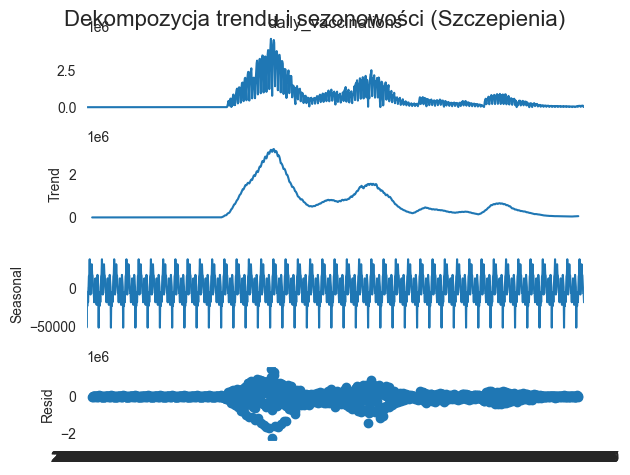

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


usaDF = pd.read_csv('../Projekt_PAD/data_output/usa_covid_analysis.csv')

usaDF.set_index("Date_reported", inplace=True)

decompose_result = seasonal_decompose(usaDF['New_deaths'], model='additive', period=30)

plt.figure(figsize=(0, 10))
decompose_result.plot()
plt.suptitle('Dekompozycja trendu i sezonowości (Nowe zgony)', fontsize=16)
plt.show()
print('=========================')

decompose_new_cases = seasonal_decompose(usaDF['New_cases'], model='additive', period=30)

plt.figure(figsize=(0, 10))
decompose_new_cases.plot()
plt.suptitle('Dekompozycja trendu i sezonowości (Nowe przypadki)', fontsize=16)
plt.show()

print('=========================')
decompose_result_daily_vaccinations = seasonal_decompose(usaDF['daily_vaccinations'], model='additive', period=30)

plt.figure(figsize=(0, 10))
decompose_result_daily_vaccinations.plot()
plt.suptitle('Dekompozycja trendu i sezonowości (Szczepienia)', fontsize=16)
plt.show()
print('=========================')

Wykresy dekompozycji trendów i sezonowości dla zgonów, nowych przypadków oraz szczepień pokazują kilka istotnych aspektów:

1. Nowe zgony
Trend: Wyraźnie widać kilka dużych fal zgonów, które z czasem maleją, zwłaszcza po rozpoczęciu masowych szczepień.
Sezonowość: Regularne wzorce sezonowe wskazują na czynniki środowiskowe lub zmienność związanych z porami roku.

2. Nowe przypadki
Trend: Szczytowe wartości przypadają na okresy wysokiej transmisji wirusa, szczególnie przy pojawieniu się nowych wariantów.
Sezonowość: Wyraźna cykliczność, prawdopodobnie związana z porami roku oraz zachowaniami społecznymi (np. lockdowny, wakacje, okresy świąteczne).
Reszty: Duże reszty wskazują na nieprzewidywalność w dynamice rozwoju pandemii, szczególnie przy szczytach przypadków.

3. Szczepienia
Trend: Wzrost na początku 2021 roku, a następnie stopniowy spadek liczby szczepień. Szczyty szczepień mogą być związane z wprowadzeniem kolejnych dawek przypominających.
Sezonowość: Cykliczność szczepień sugeruje, że kampanie szczepionkowe miały swoje okresy
Reszty: Reszty wskazują na nagłe zmiany w liczbie szczepień, które mogły być spowodowane np. decyzjami politycznymi lub ograniczeniami dostępu do szczepionek.

Skuteczność szczepień:
Po wprowadzeniu szczepionek liczba zgonów malała, mimo że liczba przypadków często wzrastała. To wskazuje na skuteczność szczepień w redukcji ciężkich przypadków COVID-19.

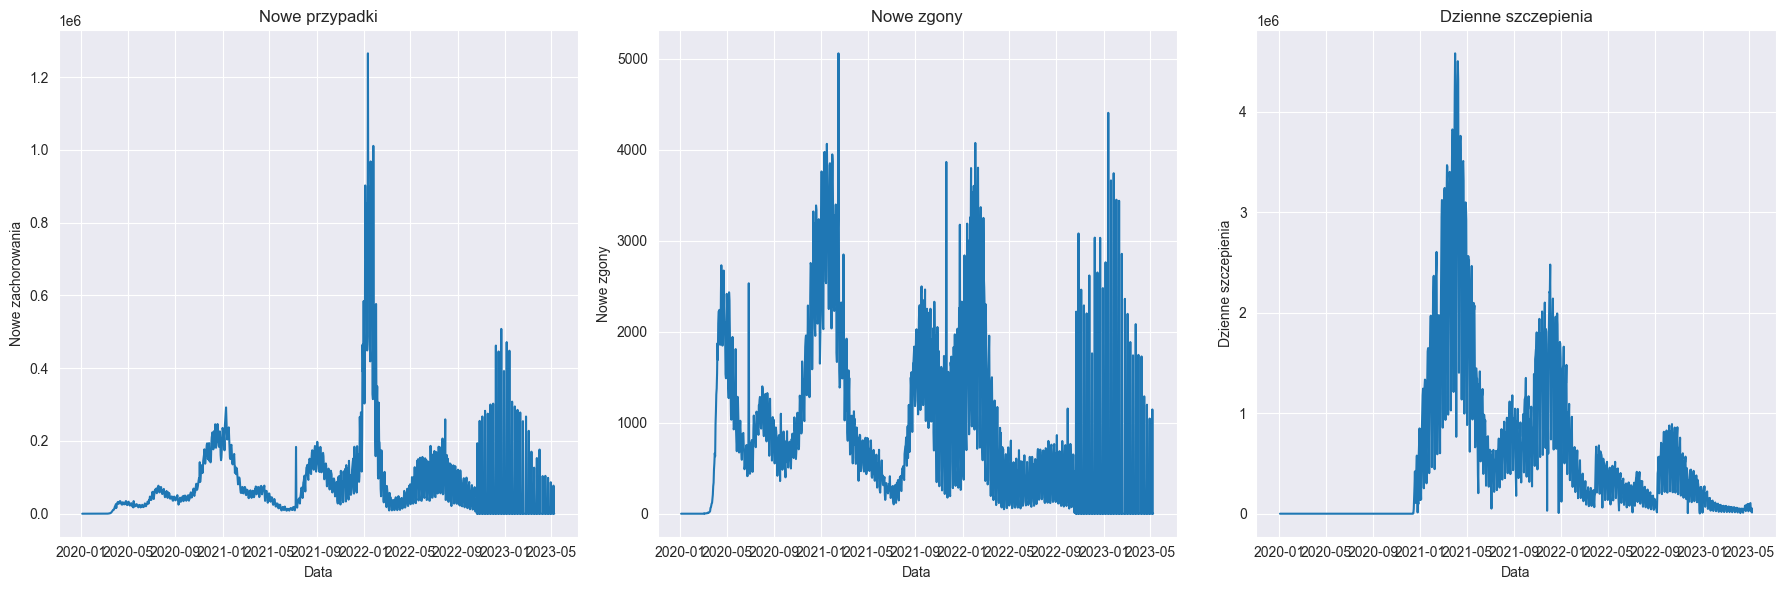

In [64]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

usaDF2 = pd.read_csv('../Projekt_PAD/data_output/usa_covid_analysis.csv')

usaDF2['Date_reported'] = pd.to_datetime(usaDF2['Date_reported'])
usaDF2 = usaDF2[usaDF2['New_deaths'] >= 0]


fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

sns.lineplot(
    data=usaDF2,
    x='Date_reported',
    y='New_cases',
    ax=axes[0]
)
axes[0].set_title('Nowe przypadki')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Nowe zachorowania')
axes[0].grid(True)

sns.lineplot(
    data=usaDF2,
    x='Date_reported',
    y='New_deaths',
    ax=axes[1]
)
axes[1].set_title('Nowe zgony')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Nowe zgony')
axes[1].grid(True)

sns.lineplot(
    data=usaDF2,
    x='Date_reported',
    y='daily_vaccinations',
    ax=axes[2]
)
axes[2].set_title('Dzienne szczepienia')
axes[2].set_xlabel('Data')
axes[2].set_ylabel('Dzienne szczepienia')
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [48]:
usaDF2

,Date_reported,New_cases,New_deaths,daily_vaccinations
0,2020-01-04,0.0,0.0,0.0
1,2020-01-05,0.0,0.0,0.0
2,2020-01-06,0.0,0.0,0.0
3,2020-01-07,0.0,0.0,0.0
4,2020-01-08,0.0,0.0,0.0
...,...,...,...,...
1217,2023-05-05,0.0,0.0,105724.0
1218,2023-05-06,0.0,0.0,40672.0
1219,2023-05-07,77165.0,1146.0,21386.0
1220,2023-05-08,0.0,0.0,55634.0


In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

usaDFWeekly = usaDF.copy()
# Konwersja kolumny 'Date_reported' na format datetime
usaDFWeekly['Date_reported'] = pd.to_datetime(usaDFWeekly['Date_reported'], errors='coerce')

# Dodanie kolumny z dniem tygodnia
usaDFWeekly['Day_of_week'] = usaDF2['Date_reported'].dt.day_name()

# Obliczenie średnich szczepień dla każdego dnia tygodnia
usaDFWeekly = usaDFWeekly.groupby('Day_of_week')['daily_vaccinations'].mean()

# Wyświetlenie wyników w porządku dni tygodnia
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_vaccinations_by_day = usaDFWeekly.reindex(days_order)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=avg_vaccinations_by_day.index,
    y=avg_vaccinations_by_day.values,
    hue=avg_vaccinations_by_day.index,
    dodge=False,
    legend=False
)
plt.title('Średnia liczba szczepień w poszczególne dni tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Średnia liczba szczepień')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


KeyError: 'Date_reported'

Większa liczba szczepień w dni robocze:
Od poniedziałku do piątku liczba szczepień jest relatywnie wysoka, osiągając szczyt w środę, czwartek i piątek.
Możliwe wyjaśnienia:
Placówki szczepień są bardziej dostępne w dni robocze.
Ludzie preferują szczepienia w dni pracy, gdy placówki są otwarte w standardowych godzinach.
W weekendy mniej punktów szczepień jest otwartych.

In [65]:
usaDF2

,Date_reported,New_cases,New_deaths,daily_vaccinations
0,2020-01-04,0.0,0.0,0.0
1,2020-01-05,0.0,0.0,0.0
2,2020-01-06,0.0,0.0,0.0
3,2020-01-07,0.0,0.0,0.0
4,2020-01-08,0.0,0.0,0.0
...,...,...,...,...
1217,2023-05-05,0.0,0.0,105724.0
1218,2023-05-06,0.0,0.0,40672.0
1219,2023-05-07,77165.0,1146.0,21386.0
1220,2023-05-08,0.0,0.0,55634.0


In [148]:
usaDF2['Year'] = usaDF2['Date_reported'].dt.year

last_valid_date = "2023-12-29"
filtered_data = usaDF2[usaDF2['Date_reported'] <= last_valid_date]

mortality_data = filtered_data.groupby('Year').apply(
    lambda df: df['New_deaths'].sum() / df['New_cases'].sum() if df['New_cases'].sum() > 0 else 0
).reset_index(name='Average Mortality Rate')

print("Yearly Average Mortality Rate:")
print(mortality_data)


Yearly Average Mortality Rate:
   Year  Average Mortality Rate
0  2020                0.017980
1  2021                0.013754
2  2022                0.005741
3  2023                0.010873


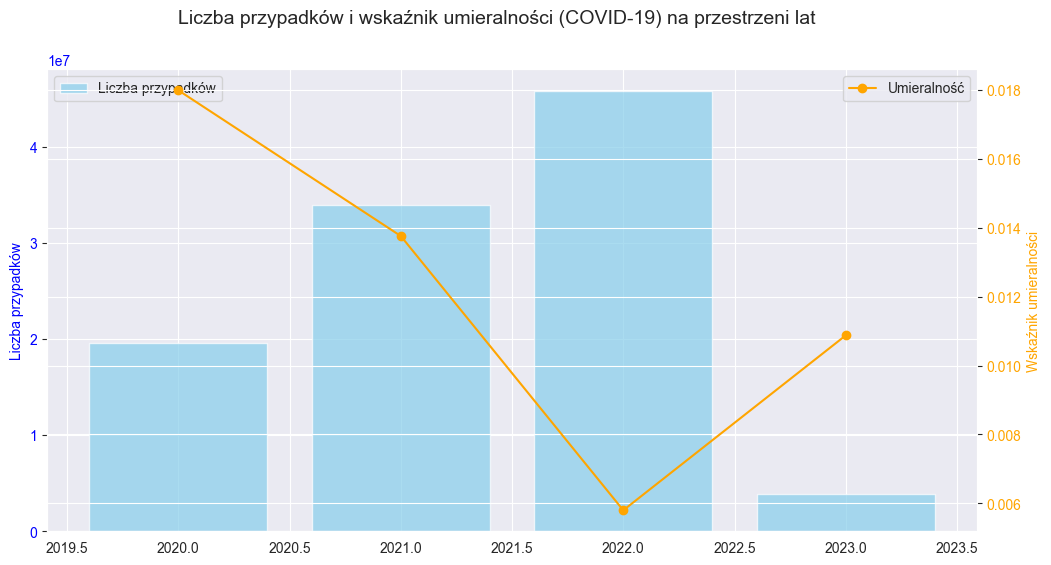

In [145]:
import matplotlib.pyplot as plt

yearly_data = filtered_data.groupby('Year').agg({
    'New_cases': 'sum',
    'New_deaths': 'sum'
}).reset_index()
yearly_data['Mortality Rate'] = yearly_data['New_deaths'] / yearly_data['New_cases']

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(yearly_data['Year'], yearly_data['New_cases'], alpha=0.7, label='Liczba przypadków', color='skyblue')
ax1.set_ylabel('Liczba przypadków', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(yearly_data['Year'], yearly_data['Mortality Rate'], color='orange', marker='o', label='Umieralność')
ax2.set_ylabel('Wskaźnik umieralności', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

fig.suptitle('Liczba przypadków i wskaźnik umieralności (COVID-19) na przestrzeni lat', fontsize=14)
ax1.legend(loc='upper left')
plt.legend(loc='upper right')

plt.show()

- Liczba przypadków rośnie i opada w zależności od lat
2021 i 2022 to lata z najwyższą liczbą przypadków, co może być związane z pojawieniem się bardziej zakaźnych wariantów
Spadek przypadków w 2023 roku może wskazywać na wygaszanie pandemii lub zmniejszoną liczbę testów i zgłoszeń


- Wskaźnik umieralności maleje w 2020–2022
Spadek wskaźnika umieralności (pomarańczowa linia) w latach 2020–2022 sugeruje, że:
Skuteczność leczenia wzrastała
Szczepienia znacząco zmniejszyły liczbę ciężkich przypadków, co ograniczyło zgony

- Wzrost wskaźnika umieralności w 2023 roku
W 2023 roku wskaźnik umieralności wzrasta, mimo że liczba przypadków spada.
Możliwe wyjaśnienia:
Mniej testów i zgłaszanych przypadków może zawyżać proporcję zgonów do zgłoszonych zakażeń.
Zmniejszona odporność populacji w wyniku wygasającego efektu szczepień.

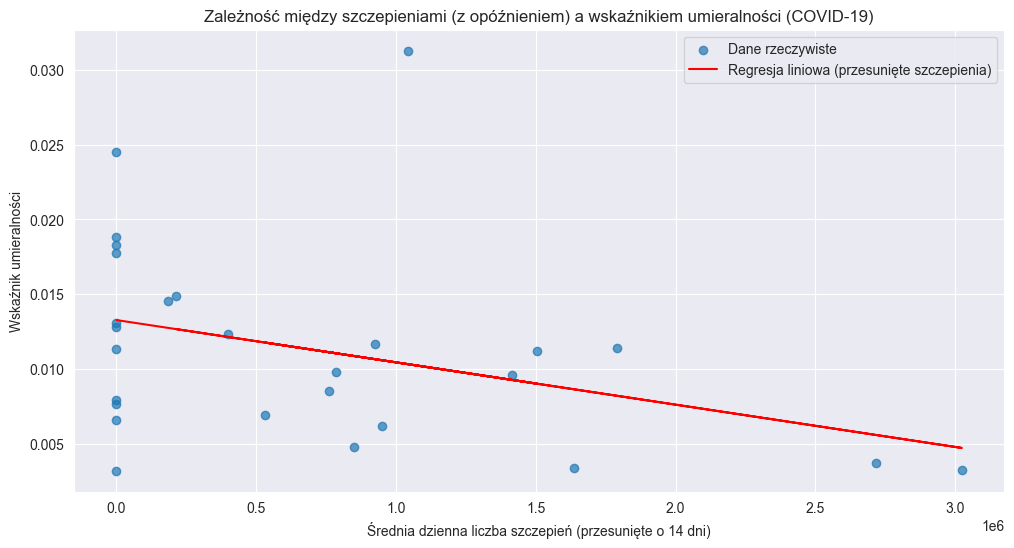

Nachylenie (coef_): [-2.8305788e-09]
Przecięcie (intercept_): 0.013261839505593365


In [75]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

filtered_data2 = filtered_data.copy()

# Przygotowanie danych: agregacja miesięczna dla daily_vaccinations i umieralności
filtered_data2['Month'] = filtered_data2['Date_reported'].dt.to_period('M')
monthly_data = filtered_data2.groupby('Month').agg({
    'daily_vaccinations': 'mean',
    'New_deaths': 'sum',
    'New_cases': 'sum'
}).reset_index()

# Dodanie wskaźnika umieralności
monthly_data['Mortality Rate'] = monthly_data['New_deaths'] / monthly_data['New_cases']

# Przesunięcie szczepień o 14 dni w przód
monthly_data['Shifted Vaccinations'] = monthly_data['daily_vaccinations'].shift(14)

# Usunięcie braków danych
monthly_data = monthly_data.dropna()

# Regresja liniowa: przesunięte szczepienia vs Mortality Rate
X_shifted = monthly_data[['Shifted Vaccinations']].values
y_shifted = monthly_data['Mortality Rate'].values

# Tworzenie modelu regresji
model_shifted = LinearRegression()
model_shifted.fit(X_shifted, y_shifted)
y_shifted_pred = model_shifted.predict(X_shifted)

# Wizualizacja
plt.figure(figsize=(12, 6))
plt.scatter(monthly_data['Shifted Vaccinations'], monthly_data['Mortality Rate'], alpha=0.7, label='Dane rzeczywiste')
plt.plot(monthly_data['Shifted Vaccinations'], y_shifted_pred, color='red', label='Regresja liniowa (przesunięte szczepienia)')
plt.xlabel('Średnia dzienna liczba szczepień (przesunięte o 14 dni)')
plt.ylabel('Wskaźnik umieralności')
plt.title('Zależność między szczepieniami (z opóźnieniem) a wskaźnikiem umieralności (COVID-19)')
plt.legend()
plt.grid(True)
plt.show()

# Wyniki regresji po przesunięciu
print("Nachylenie (coef_):", model_shifted.coef_)
print("Przecięcie (intercept_):", model_shifted.intercept_)


Zależność między szczepieniami a wskaźnikiem umieralności:
Wydaje się, że istnieje negatywna zależność (im większa liczba szczepień, tym niższy wskaźnik umieralności), co jest sugerowane przez spadkowy trend regresji liniowej.

Rozrzut danych:
Punkty danych są dość rozproszone, co oznacza, że istnieje spora zmienność, której model liniowy nie wyjaśnia.

=> Wskazuje to na to, że regresja liniowa może nie być najlepszym modelem do uchwycenia tej zależności.

In [78]:
# Agregacja dzienna
daily_data = filtered_data.groupby('Date_reported').agg({
    'daily_vaccinations': 'sum',
    'New_deaths': 'sum',
    'New_cases': 'sum'
}).reset_index()

# Dodanie wskaźnika umieralności
daily_data['Mortality Rate'] = daily_data['New_deaths'] / daily_data['New_cases']

# Przesunięcie liczby szczepień o 14 dni w przód
daily_data['Shifted Vaccinations'] = daily_data['daily_vaccinations'].shift(14)

# Usunięcie braków danych powstałych przez przesunięcie
daily_data = daily_data.dropna()

# Regresja liniowa: przesunięte szczepienia vs Mortality Rate
X_daily_shifted = daily_data[['Shifted Vaccinations']].values
y_daily_shifted = daily_data['Mortality Rate'].values


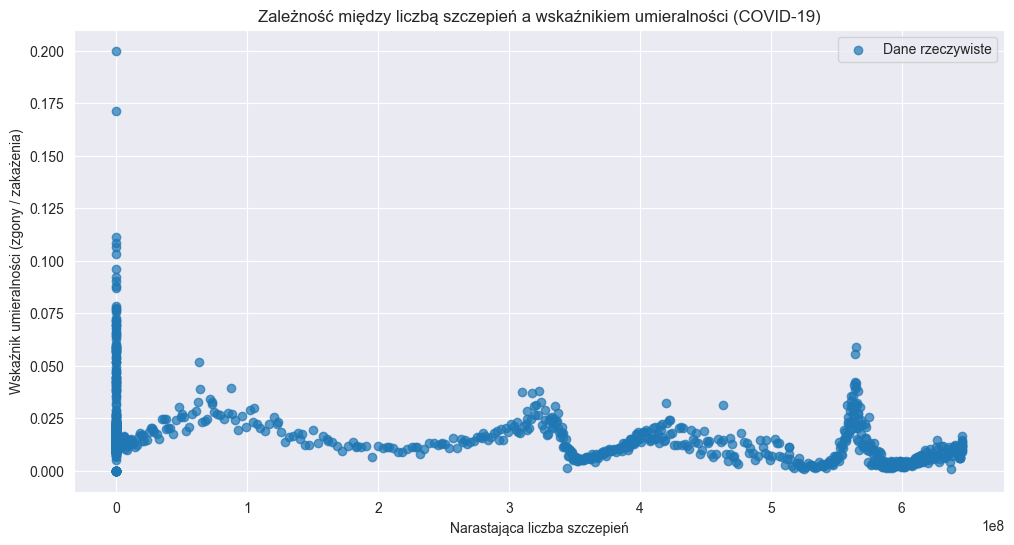

In [79]:
# Dodanie kolumny z narastającą sumą szczepień
daily_data['Cumulative Vaccinations'] = daily_data['daily_vaccinations'].cumsum()

# Usunięcie dni bez danych o przypadkach, aby uniknąć dzielenia przez zero
filtered_daily_data = daily_data[daily_data['New_cases'] > 0]

# Obliczenie wskaźnika umieralności (zgony / zakażenia)
filtered_daily_data['Mortality Rate'] = filtered_daily_data['New_deaths'] / filtered_daily_data['New_cases']

# Wizualizacja: Wskaźnik umieralności vs Suma szczepień
plt.figure(figsize=(12, 6))
plt.scatter(
    filtered_daily_data['Cumulative Vaccinations'],
    filtered_daily_data['Mortality Rate'],
    alpha=0.7,
    label='Dane rzeczywiste'
)
plt.xlabel('Narastająca liczba szczepień')
plt.ylabel('Wskaźnik umieralności (zgony / zakażenia)')
plt.title('Zależność między liczbą szczepień a wskaźnikiem umieralności (COVID-19)')
plt.grid(True)
plt.legend()
plt.show()

Interpretacja wykresu:
Początkowa faza szczepień:

W początkowych dniach pandemii, gdy liczba szczepień była bliska zeru, wskaźnik umieralności był wyższy. Może to wynikać z:
Braku odporności populacyjnej.
Słabo rozwiniętego leczenia i obciążenia systemu ochrony zdrowia.
Wzrost liczby szczepień:

Wraz z narastającą liczbą szczepień wskaźnik umieralności wyraźnie maleje.
Sugeruje to, że szczepienia mogły przyczynić się do zmniejszenia liczby ciężkich przypadków prowadzących do zgonów.
Stabilizacja wskaźnika umieralności:

Przy wyższej liczbie szczepień wskaźnik umieralności wydaje się stabilizować na niskim poziomie.
To może oznaczać, że osiągnięto efekt odporności populacyjnej, a zgony wynikają głównie z innych czynników (np. grupy ryzyka, opóźniony dostęp do szczepień).
Nagły wzrost na końcu wykresu:

Może być wynikiem specyficznych zdarzeń (np. pojawienie się nowego wariantu wirusa, nierówności w dostępie do szczepień w poszczególnych regionach).
Warto dokładniej zbadać te okresy.

In [47]:
usaDF2

,Date_reported,New_cases,New_deaths,daily_vaccinations,Year
0,2020-01-04,0.0,0.0,0.0,2020
1,2020-01-05,0.0,0.0,0.0,2020
2,2020-01-06,0.0,0.0,0.0,2020
3,2020-01-07,0.0,0.0,0.0,2020
4,2020-01-08,0.0,0.0,0.0,2020
...,...,...,...,...,...
1217,2023-05-05,0.0,0.0,105724.0,2023
1218,2023-05-06,0.0,0.0,40672.0,2023
1219,2023-05-07,77165.0,1146.0,21386.0,2023
1220,2023-05-08,0.0,0.0,55634.0,2023


# MODEL DASHBOARD

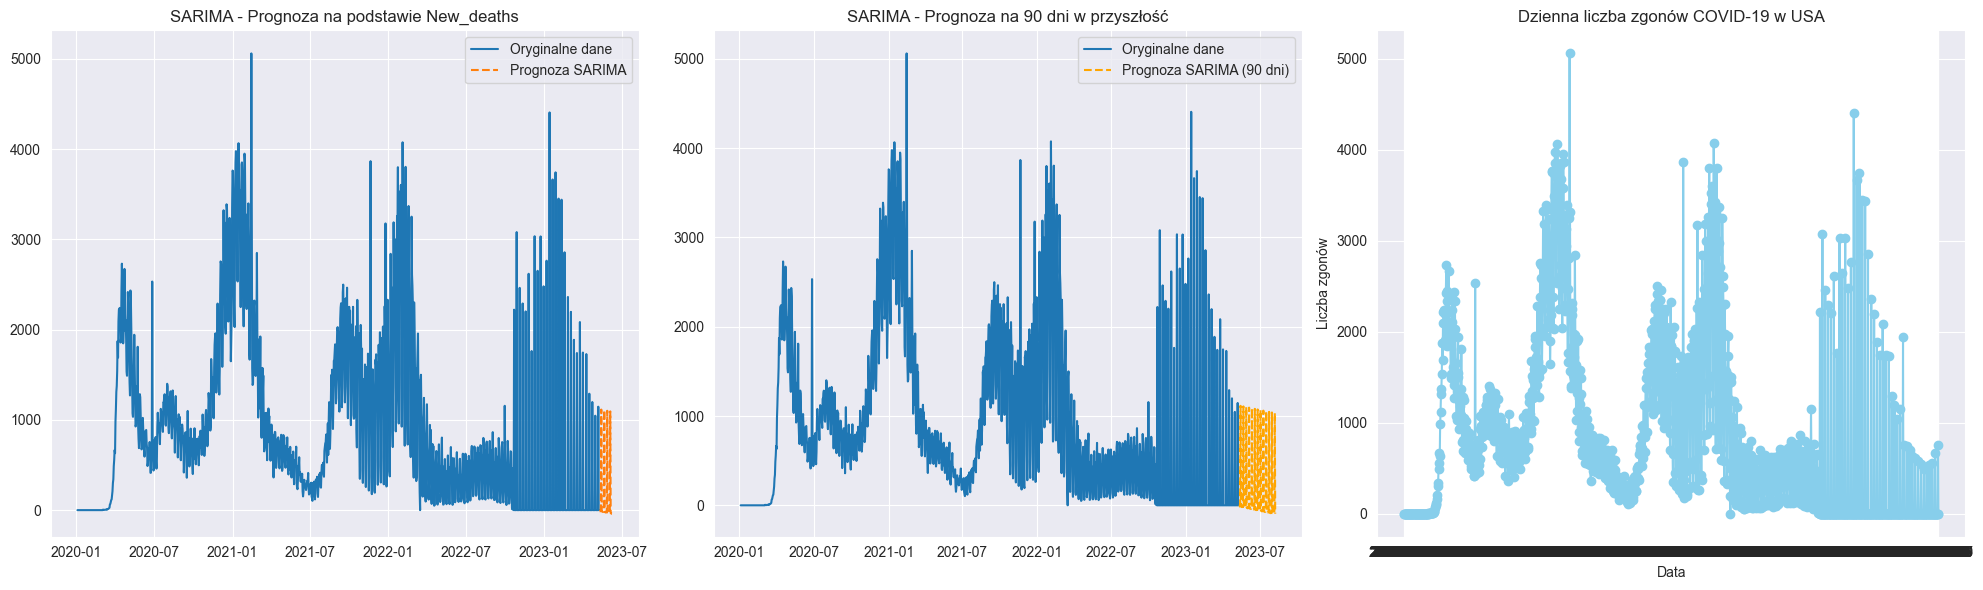

In [154]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

usaDF3 =  usaDF2
usaDF3 = usaDF3[usaDF2['New_deaths'] >= 0]

# Zsumowano liczbę zgonów dla każdej daty, uzyskując jednowymiarowy szereg czasowy.
time_series = usaDF3.groupby('Date_reported')['New_deaths'].sum()

# Uzupełnienie braków zerami
time_series = time_series.asfreq('D').fillna(0)

# Test stacjonarności (ADF Test)
adf_result = adfuller(time_series)

# Dekompozycja trendu, sezonowości i reszt
decomposition = seasonal_decompose(time_series, model='additive', period=7)  # Założenie: sezonowość tygodniowa

# Dopasowanie modelu SARIMA (na początek losowe parametry)
sarima_model = SARIMAX(time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_fit = sarima_model.fit(disp=False)

# Prognozy na 30 dni do przodu
forecast = sarima_fit.get_forecast(steps=30).predicted_mean

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Wykres 1: Prognoza SARIMA
axes[0].plot(time_series, label='Oryginalne dane')
axes[0].plot(forecast, label='Prognoza SARIMA', linestyle='--')
axes[0].legend()
axes[0].set_title('SARIMA - Prognoza na podstawie New_deaths')

extended_forecast = sarima_fit.get_forecast(steps=90).predicted_mean

axes[1].plot(time_series, label='Oryginalne dane')
axes[1].plot(extended_forecast, label='Prognoza SARIMA (90 dni)', linestyle='--', color='orange')
axes[1].legend()
axes[1].set_title('SARIMA - Prognoza na 90 dni w przyszłość')

daily_covid_info_path = 'data/daily_covid_info.csv'

daily_covid_info = pd.read_csv(daily_covid_info_path)

daily_covid_info_us = daily_covid_info[daily_covid_info['Country_code'] == 'US'].copy()

daily_covid_info_us['New_deaths'] =daily_covid_info_us['New_deaths'].fillna(0)
daily_covid_info_us.loc[:, "New_deaths"] = daily_covid_info_us["New_deaths"].clip(lower=0)

daily_covid_info_us_sorted = daily_covid_info_us.sort_values(by="Date_reported")

last_valid_date = "2023-08-09"

daily_covid_info_us_sorted = daily_covid_info_us_sorted[daily_covid_info_us_sorted['Date_reported'] <= last_valid_date]

axes[2].plot(daily_covid_info_us_sorted["Date_reported"], daily_covid_info_us_sorted["New_deaths"],
             marker="o", linestyle="-", color="skyblue")
axes[2].set_title("Dzienna liczba zgonów COVID-19 w USA", fontsize=12)
axes[2].set_xlabel("Data", fontsize=10)
axes[2].set_ylabel("Liczba zgonów", fontsize=10)

plt.tight_layout()
plt.show()


In [164]:
adf_summary = {
    'ADF Statistic': adf_result[0],
    'p-value': adf_result[1]
}
adf_summary

{'ADF Statistic': -3.6470430907896034, 'p-value': 0.004922798192565628}

Wyniki testu ADF:
ADF Statistic: -3.6470
Im bardziej wartość jest ujemna, tym silniejsza stacjonarność danych.
p-value: 0.0049
Poniżej typowego progu 0.05, co oznacza, że możemy odrzucić hipotezę zerową o niestacjonarności danych. To wskazuje, że dane są stacjonarne.


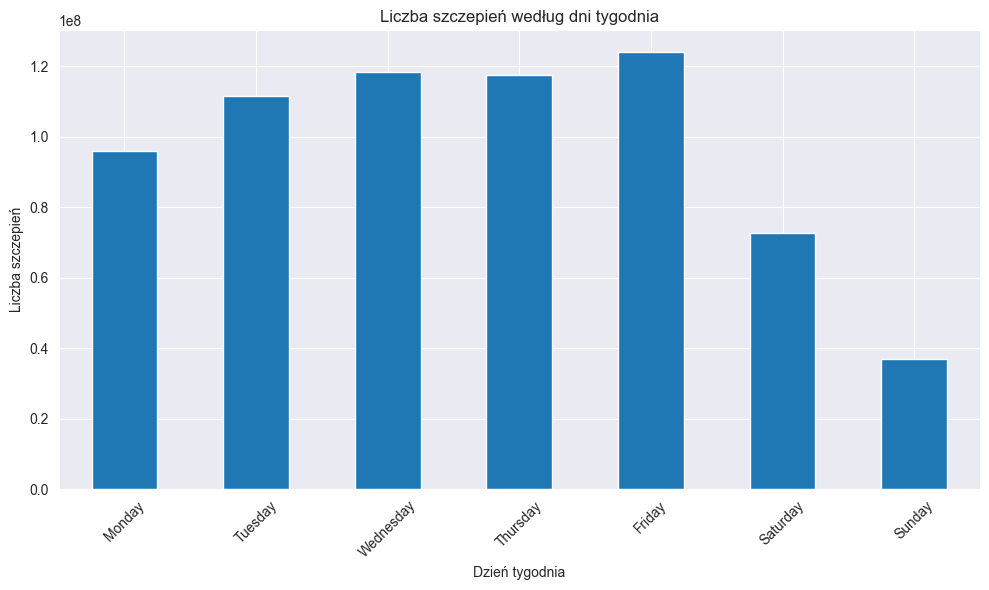

In [159]:


usaDF2['Date_reported'] = pd.to_datetime(usaDF2['Date_reported'])

usaDF2['Day_of_Week'] = usaDF2['Date_reported'].dt.day_name()

vaccinations_by_day = usaDF2.groupby('Day_of_Week')['daily_vaccinations'].sum()

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
vaccinations_by_day = vaccinations_by_day.reindex(days_order)

plt.figure(figsize=(10, 6))
vaccinations_by_day.plot(kind='bar')
plt.title('Liczba szczepień według dni tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba szczepień')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Ogólny wniosek:
Analiza danych COVID-19 w USA wskazuje na tendencję spadkową liczby zgonów w najbliższych miesiącach. Model SARIMA skutecznie odzwierciedla zarówno sezonowość, jak i trend w danych, co czyni go wiarygodnym narzędziem do prognozowania. Prognozy te mogą być przydatne w planowaniu zasobów medycznych i ocenie wpływu pandemii w nadchodzącym okresie.